# Crop Recommendation System

## 1 . Importing the necessary libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

## 2. Importing the data files

crop_db

In [8]:
crop = pd.read_csv('Data/cropDB.csv')
crop.head()

crop_name  no_of_months  min_temp  max_temp  min_ph  max_ph  \
0         Bajra             3        18        30     3.0     8.0   
1        Banana             4        15        35     6.5     8.5   
2        Barley             4        12        32     3.0     8.0   
3          Bean             2        14        32     5.5     6.5   
4  Black pepper             6        23        33     5.5     6.5   

   min_rainfall  max_rainfall   n   p   k  
0           350           750   L   L   M  
1           450           750   M  VL  VL  
2           800          1100  VL  VL   M  
3           300           500   L  VL   M  
4          1200          2500   H  VL   M

In [9]:
crop.describe().T

count         mean         std    min    25%    50%     75%  \
no_of_months   56.0     4.303571    2.044235    2.0    3.0    4.0     5.0   
min_temp       56.0    17.678571    4.411172    7.0   15.0   18.0    20.0   
max_temp       56.0    32.410714    3.686717   23.0   30.0   32.5    35.0   
min_ph         56.0     5.435714    0.760963    3.0    5.0    5.5     6.0   
max_ph         56.0     7.462500    0.735975    6.4    7.0    7.5     8.0   
min_rainfall   56.0   611.160714  316.763449  100.0  400.0  500.0   712.5   
max_rainfall   56.0  1089.285714  632.937903  300.0  737.5  900.0  1125.0   

                 max  
no_of_months    12.0  
min_temp        25.0  
max_temp        40.0  
min_ph           7.0  
max_ph          10.0  
min_rainfall  1500.0  
max_rainfall  4000.0

rain_fall

In [11]:
rainfall = pd.read_csv('Data/temprainfall.csv')
rainfall.head()

city      state      month  max_temp  min_temp  rainfall
0  Bangalore   Karnataka   January       27.4      15.0       4.9
1  Bangalore   Karnataka  February       30.1      16.6       7.9
2  Bangalore   Karnataka     March       32.8      19.0      10.0
3  Bangalore   Karnataka     April       33.9      21.3      43.9
4  Bangalore   Karnataka       May       33.1      21.1     111.9

In [12]:
np.unique(rainfall.state.values)

array(['Andaman and Nicobar', 'Assam', 'Goa', 'Gujarat',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Punjab', 'Tamilnadu',
       'Uttar Pradesh', 'Uttarkhand', 'West Bengal'], dtype=object)

In [13]:
rainfall.describe().T

count        mean         std  min     25%    50%    75%     max
max_temp  240.0   29.518333    6.005395  5.0  27.850  30.20   32.8    41.4
min_temp  240.0   18.700833    6.466172 -2.3  14.475  20.80   23.6    27.9
rainfall  240.0  122.838333  178.546349  0.1  15.875  55.05  159.3  1200.4

nutrients

In [14]:
nutrients = pd.read_csv('Data/nutrientsarea.csv')
nutrients.head()

state   n   p   k   ph
0  Andaman and Nicobar   L  VL   L  6.5
1       Andhra Pradesh   H  VH   M  6.3
2    Arunachal Pradesh   H   M   M  5.6
3                Assam   M   L  VL  6.5
4                Bihar  VL  VH   H  6.0

In [15]:
nutrients.describe().T

count      mean       std  min   25%  50%  75%  max
ph   31.0  6.090323  0.407721  5.0  5.95  6.0  6.3  7.0

Production

In [151]:
production = pd.read_csv('Data/production.csv').drop(['index'],axis=1)
production.head()

Temperature   Ph   Crop   Production
0          20.0  3.0  Bajra      0.00690
1          20.0  3.2  Bajra      0.00747
2          20.0  3.2  Bajra      0.00749
3          20.0  3.2  Bajra      0.00822
4          20.0  3.2  Bajra      0.00895

In [152]:
production.describe().T

count       mean        std      min       25%       50%  \
 Temperature  189232.0  25.262492   4.585660  7.00000  22.02683  25.00000   
 Ph           189232.0   6.337846   0.788959  3.00000   5.80000   6.30000   
 Production   189232.0   5.262677  14.441616  0.00034   0.58442   1.16667   

                   75%        max  
 Temperature  28.21500   39.04500  
 Ph            6.90000    8.80000  
 Production    2.98963  955.75034

In [153]:
production.shape

(189232, 4)

## 3. Exploratory data analysis

### 3.1 ANALYSIS OF CROP DATA

#### 3.1.1 Analyzing crop v/s number of months required 

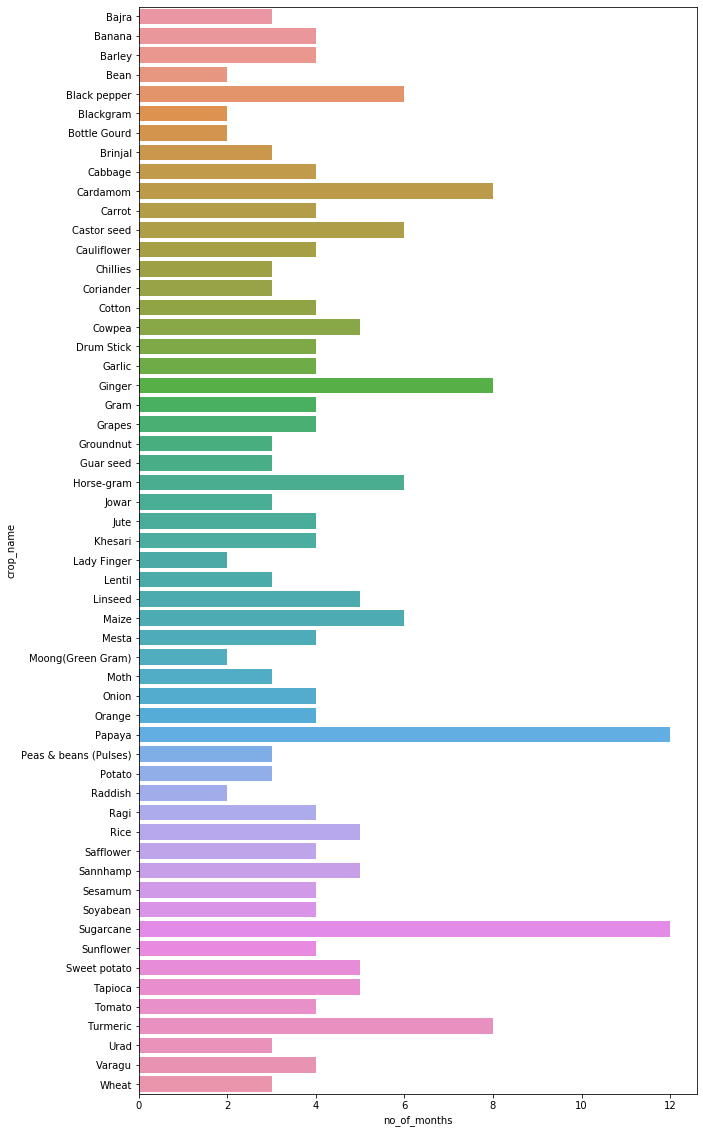

In [20]:
plt.figure(figsize=(10,20))
plt.ylabel('Crop')
plt.xlabel('Number of months')
sns.barplot(x=crop['no_of_months'],y=crop['crop_name'])

#### 3.1.2 Analyzing min_temp distribution required by crop

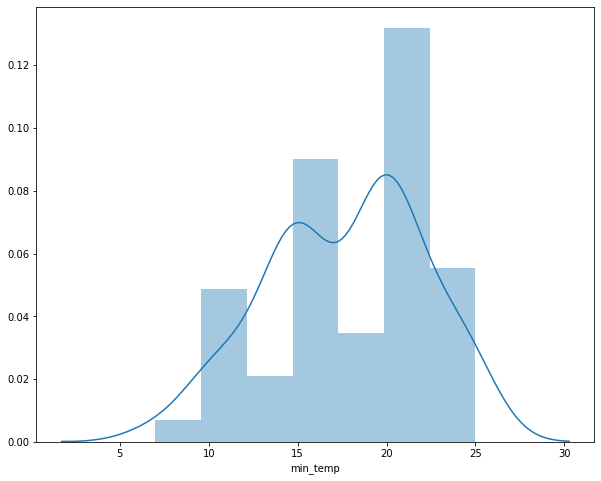

In [26]:
plt.figure(figsize=(10,8))
sns.distplot(crop['min_temp'])

Text(0.5, 1.0, 'PDF vs CDF for min_temp')

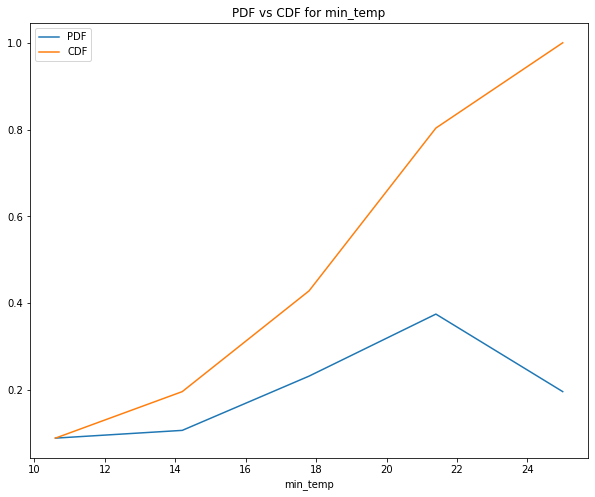

In [22]:
count,binedges = np.histogram(crop['min_temp'], bins=5, density = True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.figure(figsize=(10,8))
plt.plot(binedges[1:],pdf,label="PDF")
plt.plot(binedges[1:], cdf,label="CDF")
plt.xlabel('min_temp')
plt.legend()
plt.title("PDF vs CDF for min_temp")

<label>Observation : from the above plot</label>
<blockquote style="color:maroon;font-size:18px;">
<ul type="none">
    <li>35% of all the crops that can be grown in india need atleast ~ 21 degrees minimum temperature.</li>
    <li>90% of all the crops that can be grown in india need a minimum temperature of &le; 24 degrees of temperature.</li>
</ul>    
</blockquote>

#### 3.1.3 Analyzing max_temp distribution required by crop

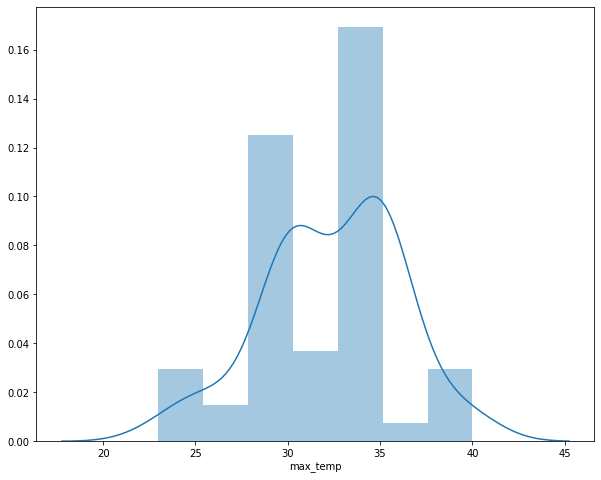

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(crop['max_temp'])

Text(0.5, 1.0, 'PDF vs CDF for max_temp')

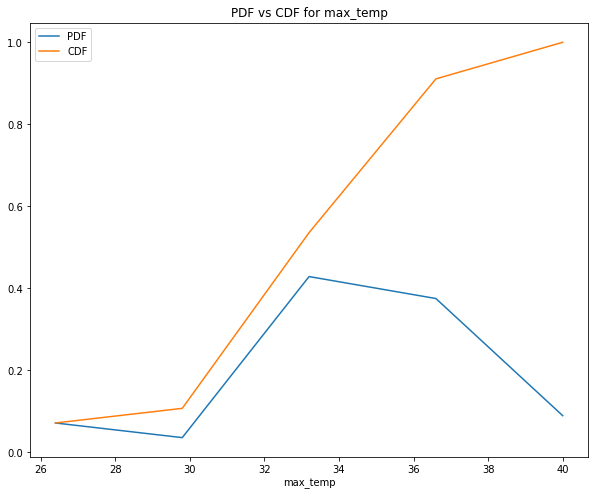

In [24]:
count,binedges = np.histogram(crop['max_temp'], bins=5, density = True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.figure(figsize=(10,8))
plt.plot(binedges[1:],pdf,label="PDF")
plt.plot(binedges[1:], cdf,label="CDF")
plt.xlabel('max_temp')
plt.legend()
plt.title("PDF vs CDF for max_temp")

<label>Observation : from the above plot</label>
<blockquote style="color:maroon;font-size:18px;">
<ul type="none">
    <li>42% of all the crops that can be grown in india can atmost bear ~ 33 degrees of temperature.</li>
    <li>90% of all the crops that can be grown in india can bear a maximum temperature of &le; 38 degrees of temperature.</li>
</ul>    
</blockquote>

#### 3.1.4 Analyzing min_ph distribution required by crop

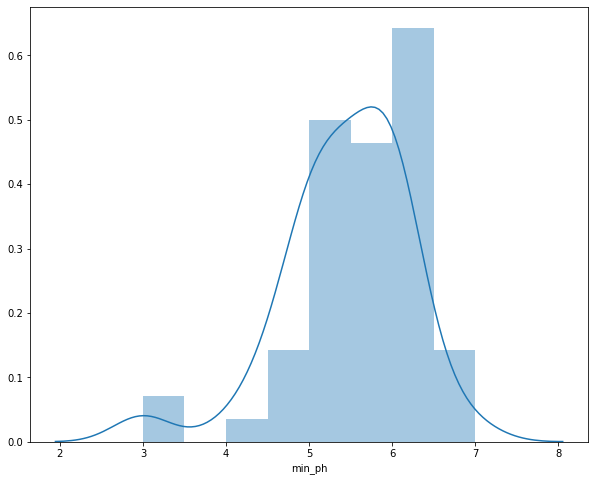

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(crop['min_ph'])

Text(0.5, 1.0, 'PDF vs CDF for min_ph')

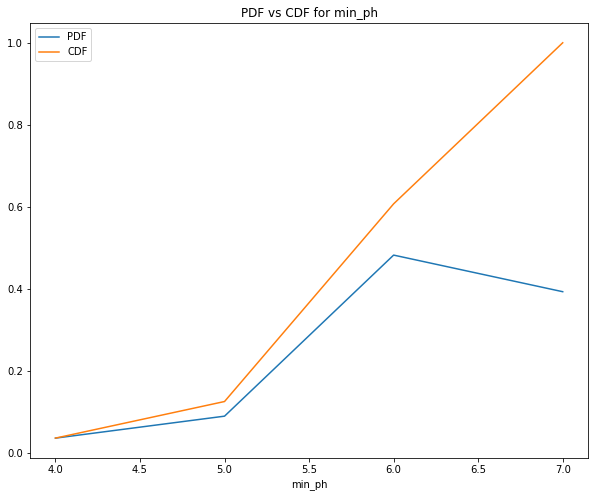

In [28]:
count,binedges = np.histogram(crop['min_ph'], bins=4, density = True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.figure(figsize=(10,8))
plt.plot(binedges[1:],pdf,label="PDF")
plt.plot(binedges[1:], cdf,label="CDF")
plt.xlabel('min_ph')
plt.legend()
plt.title("PDF vs CDF for min_ph")

<label>Observation : from the above plot</label>
<blockquote style="color:maroon;font-size:18px;">50% of the crops atleast need a minimum ph value of 6.0.
</blockquote>

#### 3.1.5 Analyzing max_ph distribution required by crop

In [32]:
print(max(crop['max_ph']))

10.0


<label>Observation : from the above plot</label>
<blockquote style="color:maroon;font-size:18px;">Any crop do not need ph value greater than 10.
</blockquote>

#### 3.1.6 Analyzing the required levels of nitrogen for the crops

Text(0.5, 0, 'nitrogen requirement')

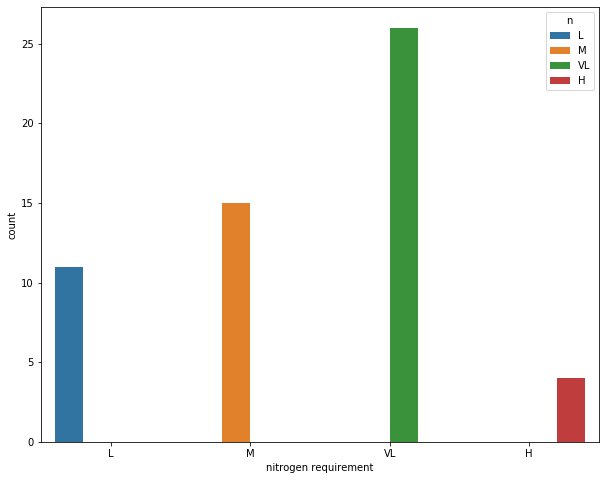

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(x=crop['n'],hue=crop['n'])
plt.xlabel('nitrogen requirement')

In [41]:
crop['n'].describe()

count     56
unique     4
top       VL
freq      26
Name: n, dtype: object

#### 3.1.7 Analyzing the required levels of phosphorous for the crops

Text(0.5, 0, 'phosphorous requirement')

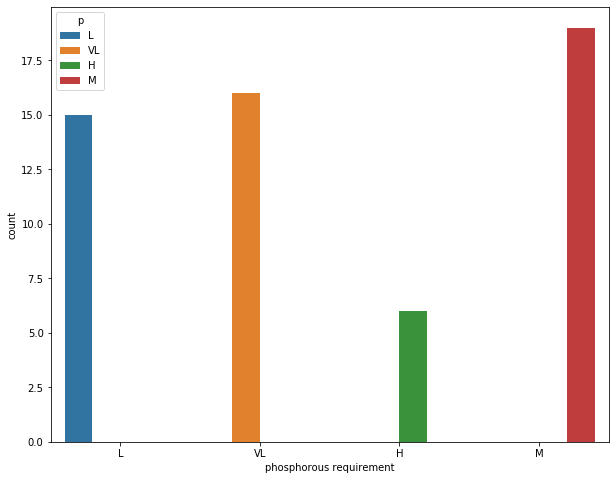

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(x=crop['p'],hue=crop['p'])
plt.xlabel('phosphorous requirement')

In [43]:
crop['p'].describe()

count     56
unique     4
top        M
freq      19
Name: p, dtype: object

#### 3.1.8 Analyzing the required levels of potassium for the crops

Text(0.5, 0, 'potassium requirement')

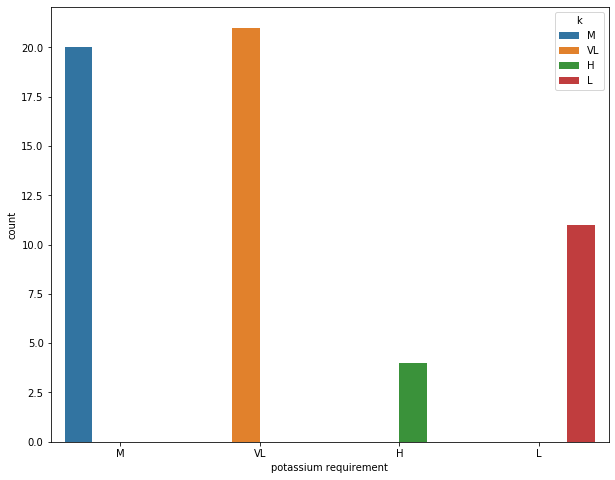

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(x=crop['k'],hue=crop['k'])
plt.xlabel('potassium requirement')

In [45]:
crop['k'].describe()

count     56
unique     4
top       VL
freq      21
Name: k, dtype: object

#### 3.1.9 Analyzing the min_rainfall

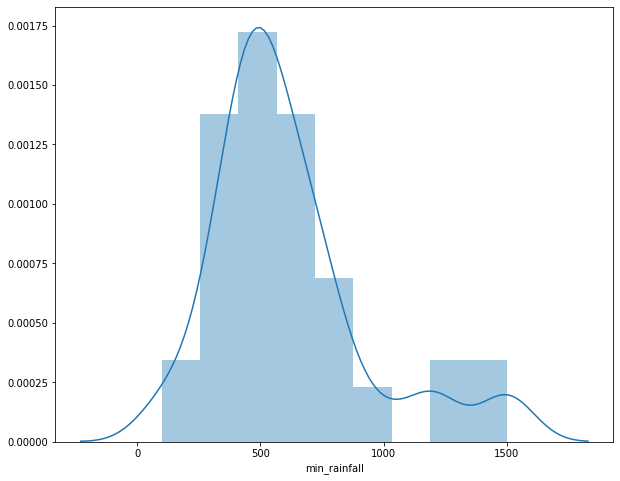

In [46]:
plt.figure(figsize=(10,8))
sns.distplot(crop['min_rainfall'])

Text(0.5, 1.0, 'PDF vs CDF for min_rainfall')

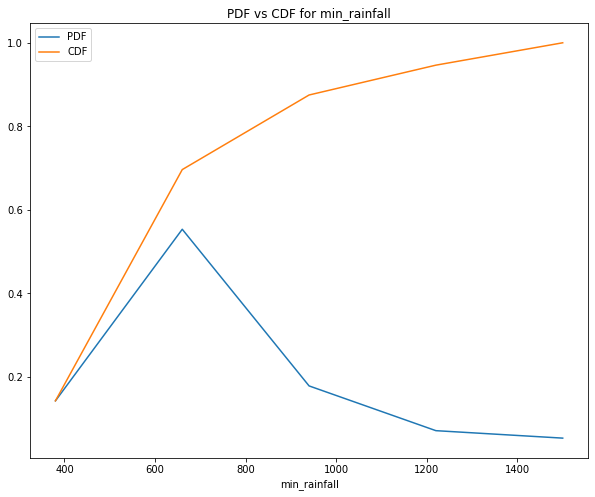

In [49]:
count,binedges = np.histogram(crop['min_rainfall'], bins=5, density = True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.figure(figsize=(10,8))
plt.plot(binedges[1:],pdf,label="PDF")
plt.plot(binedges[1:], cdf,label="CDF")
plt.xlabel('min_rainfall')
plt.legend()
plt.title("PDF vs CDF for min_rainfall")

<label>Observation : from the above plot</label>
<blockquote style="color:maroon;font-size:18px;">More than 80% of the crops need a rainfall of ≤ 960mm.
</blockquote>

#### 3.1.9 Analyzing the max_rainfall

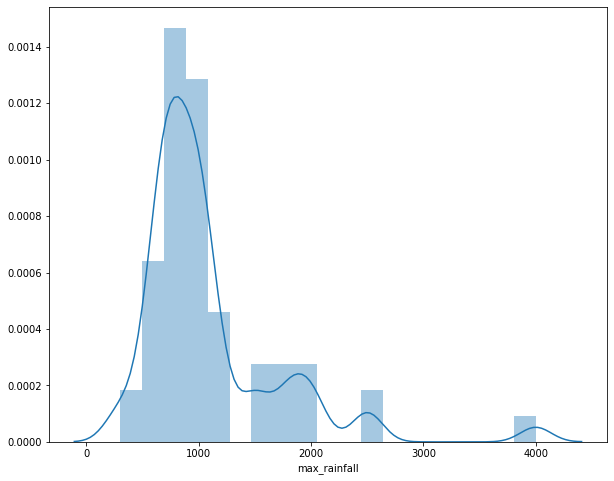

In [50]:
plt.figure(figsize=(10,8))
sns.distplot(crop['max_rainfall'])

Text(0.5, 1.0, 'PDF vs CDF for max_rainfall')

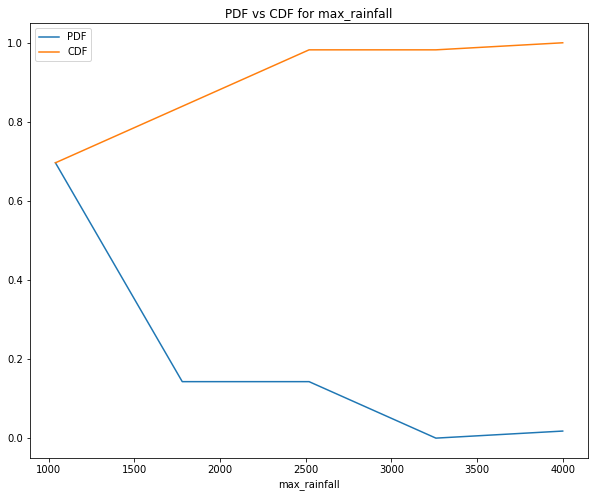

In [53]:
count,binedges = np.histogram(crop['max_rainfall'], bins=5, density = True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.figure(figsize=(10,8))
plt.plot(binedges[1:],pdf,label="PDF")
plt.plot(binedges[1:], cdf,label="CDF")
plt.xlabel('max_rainfall')
plt.legend()
plt.title("PDF vs CDF for max_rainfall")

<label>Observation : from the above plot</label>
<blockquote style="color:maroon;font-size:18px;">For 98% of the crops a max rainfall ≤ 2500mm is sufficient.
</blockquote>

### 3.2 ANALYSIS OF RAINFALL DATA

#### 3.2.1 Analyzing the temperatures of Bangalore

In [54]:
city = rainfall[rainfall.city=='Bangalore ']
city.head()

city      state      month  max_temp  min_temp  rainfall
0  Bangalore   Karnataka   January       27.4      15.0       4.9
1  Bangalore   Karnataka  February       30.1      16.6       7.9
2  Bangalore   Karnataka     March       32.8      19.0      10.0
3  Bangalore   Karnataka     April       33.9      21.3      43.9
4  Bangalore   Karnataka       May       33.1      21.1     111.9

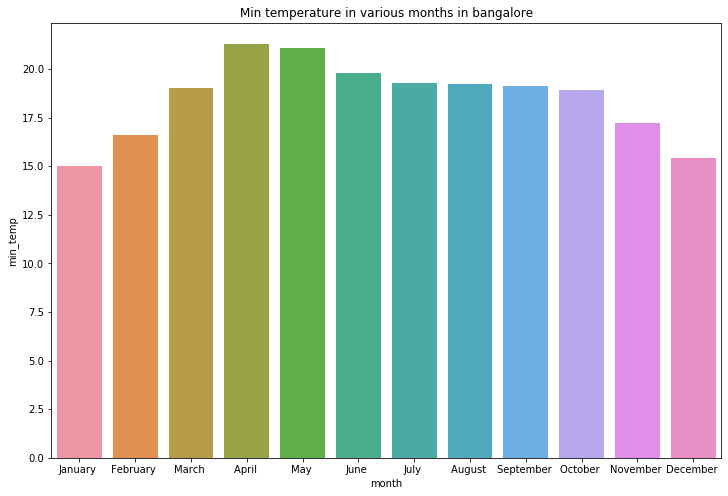

In [55]:
plt.figure(figsize=(12,8))
plt.title("Min temperature in various months in bangalore")
sns.barplot(data=city,x='month',y='min_temp')

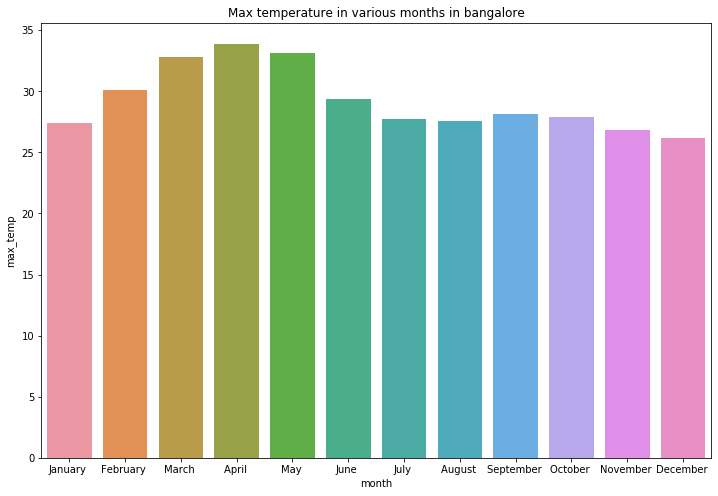

In [57]:
plt.figure(figsize=(12,8))
plt.title("Max temperature in various months in bangalore")
sns.barplot(data=city,x='month',y='max_temp')

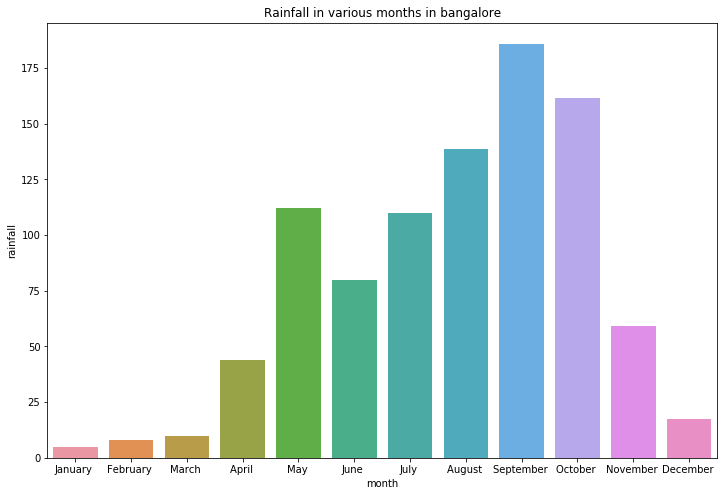

In [59]:
plt.figure(figsize=(12,8))
plt.title("Rainfall in various months in bangalore")
sns.barplot(data=city,x='month',y='rainfall')

### 3.3 ANALYZING THE NUTRIENTS DATA

#### 3.3.1 Analyzing ph value for each state

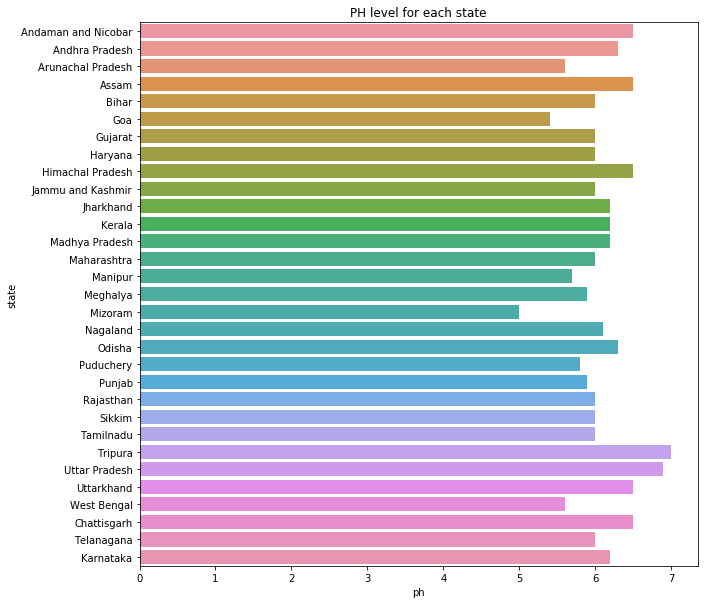

In [60]:
plt.figure(figsize=(10,10))
plt.xlabel("PH value")
plt.ylabel("State")
plt.title("PH level for each state")
sns.barplot(data=nutrients,x='ph',y='state')

#### 3.3.2 Analyzing the nitrogen, phosphorous, potassium levels in each state

In [61]:
nutrients

state   n   p   k   ph
0   Andaman and Nicobar   L  VL   L  6.5
1        Andhra Pradesh   H  VH   M  6.3
2     Arunachal Pradesh   H   M   M  5.6
3                 Assam   M   L  VL  6.5
4                 Bihar  VL  VH   H  6.0
5                   Goa   M  VL   M  5.4
6               Gujarat   L  VH   H  6.0
7               Haryana  VL   M   H  6.0
8      Himachal Pradesh   M   M   H  6.5
9     Jammu and Kashmir   H   M   M  6.0
10            Jharkhand   L   M   M  6.2
11               Kerala   H  VH   M  6.2
12       Madhya Pradesh   L   M   H  6.2
13          Maharashtra   M   H   M  6.0
14              Manipur   L  VH   L  5.7
15             Meghalya   L   M   M  5.9
16              Mizoram   M   M   M  5.0
17             Nagaland   M  VL   H  6.1
18               Odisha  VL   M   M  6.3
19            Puduchery   L   M   M  5.8
20               Punjab   M   M   H  5.9
21            Rajasthan   L   M   L  6.0
22               Sikkim   M   M   M  6.0
23            Tamilnadu   H  VH   H  6.0
24              Tripura   L   M   L  7.0
25        Uttar Pradesh  VL   M   H  6.9
26           Uttarkhand   L   M   M  6.5
27          West Bengal   M  VH   M  5.6
28          Chattisgarh   L   M   L  6.5
29           Telanagana   L  VH   H  6.0
30            Karnataka   L  VH   M  6.2

## 4. Recommendation of the crop

### 4.1 Taking the users preference

In [77]:
city_name = input()+str(' ')

Kolkata


In [78]:
state_name = input()

West Bengal


### 4.2 Getting appropriate crops based on the climatic conditions of the suitable cities

In [79]:
min_rainfall_for_crop = crop['min_rainfall'].values
max_rainfall_for_crop = crop['max_rainfall'].values
min_temp_for_crop = crop['min_temp'].values
max_temp_for_crop = crop['max_temp'].values
city = rainfall[rainfall.city==city_name]
city_max_temp = city['max_temp'].values
city_min_temp = city['min_temp'].values
city_rainfall = city['rainfall'].values
crop_index1 = []
temp =[]
month_index1 = {}
for i in range(len(city_max_temp)):
    temp=[]
    for j in range(len(min_rainfall_for_crop)):
        if city_rainfall[i]>=min_rainfall_for_crop[j] and city_rainfall[i]<=max_rainfall_for_crop[j]:
            if (city_max_temp[i]<=max_temp_for_crop[j]) and (city_min_temp[i]>=min_temp_for_crop[j]):
                crop_index1.append(j)
                temp.append(j)
        month_index1[i]=temp

In [80]:
crop_index1 = np.unique(crop_index1)

### 4.3 Getting appropriate crops according to states current nitrogen,phosphorous, potassium levels

In [104]:
crop_n_level = crop['n'].values 
crop_p_level = crop['p'].values
crop_k_level = crop['k'].values
state_n_value = nutrients[nutrients.state==state_name].n
state_p_value = nutrients[nutrients.state==state_name].p
state_k_value = nutrients[nutrients.state==state_name].k
state_ph_level = nutrients[nutrients.state==state_name].ph
crop_index2=[]
count=0
for i in range(len(crop_k_level)):
    if crop_k_level[i]==str(state_k_value.values[0]):
        count+=1
    if crop_p_level[i]==str(state_p_value.values[0]):
        count+=1
    if crop_n_level[i]==str(state_n_value.values[0]):
        count+=1
    if crop.min_ph.values[i]<=state_ph_level.values[0] and crop.max_ph.values[i]<=state_ph_level.values[0]:
        count+1
    if count>1:
        crop_index2.append(i)
    count=0

## 4.4 Suggesting best values based on production levels

### 4.4.1 Getting Best recommendations from above both 4.2 and 4.3 methods

In [105]:
crop_recommendations1=[]
crop_recommendations2=[]
for i in crop_index1:
    crop_recommendations1.append(crop['crop_name'].values[i])
for i in crop_index2:
    crop_recommendations2.append(crop['crop_name'].values[i])

In [106]:
print("The best crop recommendations based on the climatic conditions for the {0} state and {1} city are : \n".format(state_name,city_name))
print(crop_recommendations1)

The best crop recommendations based on the climatic conditions for the West Bengal state and Kolkata  city are : 

['Bean', 'Guar seed', 'Jute']


In [107]:
print("The best crop recommendations based on the soil for the {0} state and {1} city are : \n".format(state_name,city_name))
print(crop_recommendations2)

The best crop recommendations based on the soil for the West Bengal state and Kolkata  city are : 

['Carrot', 'Cauliflower', 'Mesta', 'Soyabean']


### 4.4.2 Getting Producton rate of above crops

In [164]:
avg_temp = (city_min_temp + city_max_temp)/2
avg_temp = sum(avg_temp)/12
ph_value = nutrients[nutrients.state==state_name].ph.values[0]

In [174]:
production = production.rename({' Production':'production',' Temperature':'temperature',' Ph':'ph'},axis=1)
x = production.drop('production',axis=1)
y = production.production.values
crop_names = np.unique(x['Crop'].values)

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [167]:
print(x_train.shape)
print(x_test.shape)

(132462, 3)
(56770, 3)


In [168]:
vec = CountVectorizer()
vec.fit(x_train.Crop)
x_train_crop = vec.transform(x_train.Crop)
x_test_crop = vec.transform(x_test.Crop)

In [169]:
x_tr = hstack((x_train.temperature.values.reshape(-1,1),x_train.ph.values.reshape(-1,1),x_train_crop)).tocsr()
x_ts = hstack((x_test.temperature.values.reshape(-1,1),x_test.ph.values.reshape(-1,1),x_test_crop)).tocsr()

In [105]:
rg = RandomForestRegressor()
rg.fit(x_tr,y_train)
print(rg.score(x_tr,y_train))
print(rg.score(x_ts,y_test))

0.9374460642814206
0.9116142943169792


#########################################################################

In [175]:
production = production.rename({' Production':'production',' Temperature':'temperature',' Ph':'ph'},axis=1)
x = production.drop('production',axis=1)
y = production.production.values

In [176]:
l = LabelEncoder()
l.fit(x.Crop)
x['Crop'] = l.transform(x.Crop)

In [180]:
mappings = pd.DataFrame()
mappings['crop'] = crop_names
mappings['value'] = l.transform(crop_names)

In [181]:
mappings

crop  value
0                   Bajra      0
1                  Banana      1
2                  Barley      2
3                    Bean      3
4            Black pepper      4
5               Blackgram      5
6            Bottle Gourd      6
7                 Brinjal      7
8                 Cabbage      8
9                Cardamom      9
10                 Carrot     10
11            Castor seed     11
12            Cauliflower     12
13               Chillies     13
14              Colocosia     14
15              Coriander     15
16                 Cotton     16
17                 Cowpea     17
18             Drum Stick     18
19                 Garlic     19
20                 Ginger     20
21                   Gram     21
22                 Grapes     22
23              Groundnut     23
24              Guar seed     24
25             Horse-gram     25
26                  Jowar     26
27                   Jute     27
28                Khesari     28
29            Lady Finger     29
30                 Lentil     30
31                Linseed     31
32                  Maize     32
33                  Mesta     33
34      Moong(Green Gram)     34
35                   Moth     35
36                  Onion     36
37                 Orange     37
38                 Papaya     38
39  Peas & beans (Pulses)     39
40              Pineapple     40
41                 Potato     41
42                Raddish     42
43                   Ragi     43
44                   Rice     44
45              Safflower     45
46               Sannhamp     46
47                Sesamum     47
48               Soyabean     48
49              Sugarcane     49
50              Sunflower     50
51           Sweet potato     51
52                Tapioca     52
53                 Tomato     53
54               Turmeric     54
55                   Urad     55
56                 Varagu     56
57                  Wheat     57

In [182]:
rg = RandomForestRegressor()
rg.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [202]:
temp =[]
y_pred=0
print("For the state {0} and city {1} the following are crop recommendations and thier production rate :\n\n".format(state_name,city_name))
for i in range(len(crop_recommendations1)):
    temp=[]
    y_pred=0
    temp.append(avg_temp)
    temp.append(ph_value)
    temp.append(l.transform([crop_recommendations1[i]])[0])
    y_pred = rg.predict(np.array(temp).reshape(1,-1))
    print("Crop : {0} \t\t Predicted production_rate : {1}".format(crop_recommendations1[i],y_pred))

For the state West Bengal and city Kolkata  the following are crop recommendations and thier production rate :


Crop : Bean 		 Predicted production_rate : [2.34981098]
Crop : Guar seed 		 Predicted production_rate : [0.8542529]
Crop : Jute 		 Predicted production_rate : [0.47918613]


In [203]:
temp =[]
y_pred=0
print("For the state {0} and city {1} the following are crop recommendations and thier production rate :\n\n".format(state_name,city_name))
for i in range(len(crop_recommendations2)):
    temp=[]
    y_pred=0
    temp.append(avg_temp)
    temp.append(ph_value)
    temp.append(l.transform([crop_recommendations2[i]])[0])
    y_pred = rg.predict(np.array(temp).reshape(1,-1))
    print("Crop : {0} \t\t Predicted production_rate : {1}".format(crop_recommendations2[i],y_pred))

For the state West Bengal and city Kolkata  the following are crop recommendations and thier production rate :


Crop : Carrot 		 Predicted production_rate : [12.94000347]
Crop : Cauliflower 		 Predicted production_rate : [0.5]
Crop : Mesta 		 Predicted production_rate : [6.79374455]
Crop : Soyabean 		 Predicted production_rate : [0.20297881]
